In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
dataset = pd.read_csv('dados/tempo.csv', sep=';')
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
dataset.shape

(14, 5)

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64


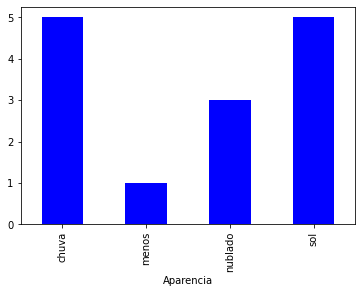

In [15]:
agrupado = dataset.groupby(['Aparencia']).size()
print(agrupado)

agrupado.plot.bar(color = 'blue')

In [8]:
dataset.groupby(['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [9]:
dataset.groupby(['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

In [11]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

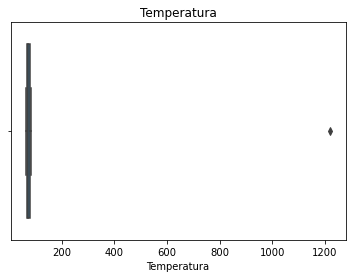

In [16]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64


Text(0.5, 1.0, 'Umidade')

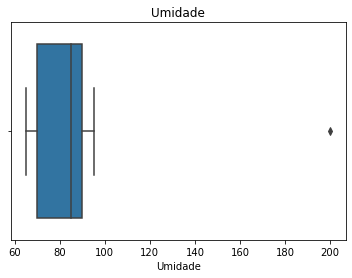

In [18]:
print(dataset['Umidade'].describe())
srn.boxplot(dataset['Umidade']).set_title('Umidade')

In [19]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [20]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [21]:
dataset['Umidade'].fillna(mediana, inplace=True)

In [22]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [25]:
moda = sts.mode(dataset['Vento'])
moda

'FALSO'

In [26]:
dataset['Vento'].fillna(moda, inplace=True)

In [27]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [30]:
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = sts.mode(dataset['Aparencia'])

In [31]:
dataset.groupby(['Aparencia']).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [34]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [38]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = sts.median(dataset['Temperatura'])

In [39]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [40]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [42]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = sts.median(dataset['Umidade'])

In [43]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
